In [30]:
print("\033[1m   \033[0m")                                                         #create a blank row
print("\033[1m   Correlation Matrix:\033[0m")                                      #assign answer number
print("\033[1m   \033[0m")                                                         #create a blank row
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the dataset
file_path = "C:/Users/Isaac/Desktop/Car-Dataset.xlsx"                              # Load data file
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="car_price_dataset")
categorical_columns = ["Brand", "Model", "Fuel_Type", "Transmission", "LuxOREco"]  #Encode categorical variables into numerical
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])  
def categorize_engine_size(size):                                                  #Encode Engine_Size by categorizing it into Small, Medium, Large
    if size < 2.5:
        return 0                                                                   #Small
    elif 2.5 <= size <= 4.0:
        return 1                                                                   #Medium
    else:
        return 2                                                                   #Large
df['Engine_Size_Category'] = df['Engine_Size'].apply(categorize_engine_size)       #Apply categorization to Engine_Size
                                                                                   #Required columns for the correlation matrix
correlation_columns = ["Brand", "Model", "Year", "Engine_Size", "Fuel_Type", "Transmission", "Mileage", "Doors", "Owner_Count", "Price", "LuxOREco", "Engine_Size_Category"]
correlation_matrix = df[correlation_columns].corr()                                #Compute the correlation matrix
print("Correlation Matrix (Rounded to 2 Decimal Places):")                         #Round to two decimal places
print(correlation_matrix.round(2))


   
   Correlation Matrix:
   
Correlation Matrix (Rounded to 2 Decimal Places):
                      Brand  Model  Year  Engine_Size  Fuel_Type  \
Brand                  1.00   0.31 -0.00         0.00      -0.01   
Model                  0.31   1.00 -0.01         0.00       0.00   
Year                  -0.00  -0.01  1.00        -0.00      -0.01   
Engine_Size            0.00   0.00 -0.00         1.00      -0.00   
Fuel_Type             -0.01   0.00 -0.01        -0.00       1.00   
Transmission           0.01  -0.01 -0.01        -0.01       0.00   
Mileage               -0.01  -0.01 -0.00         0.02      -0.01   
Doors                 -0.00   0.01  0.01        -0.01       0.01   
Owner_Count            0.02   0.02  0.00         0.01      -0.00   
Price                  0.00   0.00  0.66         0.36      -0.04   
LuxOREco              -0.43  -0.36 -0.01         0.01       0.00   
Engine_Size_Category   0.00   0.01  0.00         0.93      -0.00   

                      Transmission

   
   Linear Regression:
   
Mean Absolute Error: 800.16
Mean Squared Error: 829488.14
R^2 Score: 0.91


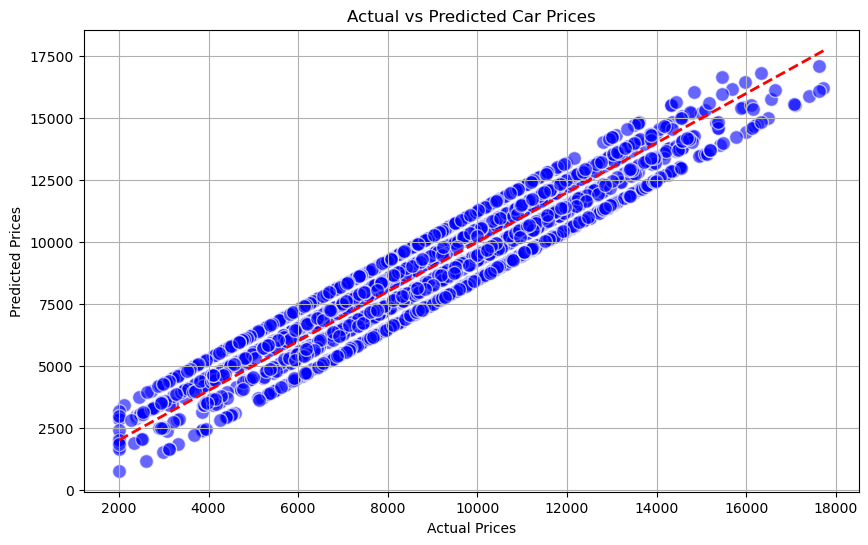

Coefficient for Year: 298.09
Coefficient for Engine_Size: 991.24
Coefficient for Mileage: -0.02
Coefficient for Transmission: -772.92
   


In [31]:
print("\033[1m   \033[0m")                                                         #create a blank row
print("\033[1m   Linear Regression:\033[0m")                                       #assign answer number
print("\033[1m   \033[0m")                                                         #create a blank row
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
file_path = "C:/Users/Isaac/Desktop/Car-Dataset.xlsx"                              #Load data
df = pd.read_excel(file_path, sheet_name="car_price_dataset")
encoder = LabelEncoder()                                                           #Encode Transmission
df['Transmission'] = encoder.fit_transform(df['Transmission'])
features = ["Year", "Engine_Size", "Mileage", "Transmission"]                      #Selecting variable
target = "Price"                                                                   #Target variable
df_clean = df.dropna(subset=features + [target])                                   #Remove missing values
X = df_clean[features]                                                             #Define independent variables and dependent variable
y = df_clean[target]
                                                                                   #Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()                                                         #Initialize model  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)                                                     #Predict
mae = mean_absolute_error(y_test, y_pred)                                          #Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
                                                                                   #Results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
plt.figure(figsize=(10, 6))                                                        #Plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='w', s=100)        #Scatter plot
                                                                                   #Plotting a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')
plt.title("Actual vs Predicted Car Prices")                                        #Chart title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()
                                                                                   #Coefficients
print(f"Coefficient for Year: {model.coef_[0]:.2f}")
print(f"Coefficient for Engine_Size: {model.coef_[1]:.2f}")
print(f"Coefficient for Mileage: {model.coef_[2]:.2f}")
print(f"Coefficient for Transmission: {model.coef_[3]:.2f}")
print("\033[1m   \033[0m")                                                         #create a blank row

In [33]:
print("\033[1m   \033[0m")                                                         #create a blank row
print("\033[1m   Cohen Effect:\033[0m")                                            #assign answer number
print("\033[1m   \033[0m")                                                         #create a blank row
import statsmodels.api as sm
import numpy as np
features = ["Year", "Engine_Size", "Mileage", "Transmission"]                      #Define features
target = "Price"                                                                   #Define target
X = df_clean[features]                                                             #Prepare data
y = df_clean[target]
X_with_intercept = sm.add_constant(X)                                              #Add constant
full_model = sm.OLS(y, X_with_intercept).fit()                                     #Model fit
r_squared_full = full_model.rsquared                                               #Calc R-squared
cohens_f2 = {}                                                                     #Calc Cohen's f^2
for feature in features:
    X_reduced = X_with_intercept.drop(columns=[feature])
    reduced_model = sm.OLS(y, X_reduced).fit()
    r_squared_reduced = reduced_model.rsquared
    f2 = (r_squared_full - r_squared_reduced) / (1 - r_squared_full)
    cohens_f2[feature] = f2
for feature, f2 in cohens_f2.items():                                              #Print results
    print(f"Cohen's f^2 for {feature}: {f2:.2f}")
print(f"""
Cohen's 𝑓2 is an effect size measure used in multiple regression to quantifies the strength of a relationship of an individual predictor variable. 
Small effect: 𝑓2=0.02
Medium effect: 𝑓2=0.15
Large effect: 𝑓2=0.35

Given your values:
Year (𝑓2=5.13 → Extremely large effect
Engine Size (𝑓2=1.56) → Very large effect
Mileage (𝑓2=357) → Very large effect
Transmission (𝑓2=0.35) → Very small effect
""")
print("\033[1m   \033[0m")                                                         #create a blank row


   
   Cohen Effect:
   
Cohen's f^2 for Year: 5.13
Cohen's f^2 for Engine_Size: 1.56
Cohen's f^2 for Mileage: 3.57
Cohen's f^2 for Transmission: 0.46

Cohen's 𝑓2 is an effect size measure used in multiple regression to quantifies the strength of a relationship of an individual predictor variable. 
Small effect: 𝑓2=0.02
Medium effect: 𝑓2=0.15
Large effect: 𝑓2=0.35

Given your values:
Year (𝑓2=5.13 → Extremely large effect
Engine Size (𝑓2=1.56) → Very large effect
Mileage (𝑓2=357) → Very large effect
Transmission (𝑓2=0.35) → Very small effect

   


In [15]:
print("\033[1m   \033[0m")                                                         #create a blank row
print("\033[1m   Test Hypotheses:\033[0m")                                         #assign answer number
print("\033[1m   \033[0m")                                                         #create a blank row
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
file_path = "C:/Users/Isaac/Desktop/Car-Dataset.xlsx"                              # Load dataset
df = pd.read_excel(file_path, sheet_name="car_price_dataset")
encoder = LabelEncoder()                                                           #Encode Transmission column
df['Transmission'] = encoder.fit_transform(df['Transmission'])
features = ["Year", "Engine_Size", "Mileage", "Transmission"]                      #Features variable
target = "Price"                                                                   #Target variable
df_clean = df.dropna(subset=features + [target])                                   #Remove rows with missing values
X = df_clean[features]                                                             #Independent and dependent
y = df_clean[target]
X = sm.add_constant(X)                                                             #Add a constant
model = sm.OLS(y, X).fit()                                                         #Fit regression model
p_values = model.pvalues[1:]                                                       #P-values 
for feature, p_value in p_values.items():                                          #Check p-value
    if p_value < 0.05:
        print(f"Feature '{feature}' has a significant relationship with car price (p-value = {p_value:.2f}) - Reject Null Hₒ")
    else:
        print(f"Feature '{feature}' does NOT have a significant relationship with car price (p-value = {p_value:.2f}) - Fail to Reject Null Hₒ")


   
   Test Hypotheses:
   
Feature 'Year' has a significant relationship with car price (p-value = 0.00) - Reject Null Hₒ
Feature 'Engine_Size' has a significant relationship with car price (p-value = 0.00) - Reject Null Hₒ
Feature 'Mileage' has a significant relationship with car price (p-value = 0.00) - Reject Null Hₒ
Feature 'Transmission' has a significant relationship with car price (p-value = 0.00) - Reject Null Hₒ
